In [15]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

In [4]:
print(np.finfo(np.float128))

Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
---------------------------------------------------------------



In [5]:
a = 0.
b = 0.25*np.pi
f = lambda x: np.sin(x)

In [6]:
I = -np.cos(b) + np.cos(a)
I

0.2928932188134524

In [10]:
n = 8
Roots1, Weights1 = np.polynomial.legendre.leggauss(n)

In [11]:
t1 = 0.5*( (b-a)*Roots1 + a + b )
Integral1 = 0.5*(b-a)*np.sum( Weights1*f(t1) )
Integral1

0.2928932188134524

In [16]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [17]:
def GetLegendre(n,x,y):
    
    y = (x**2 - 1)**n
    
    poly = sym.diff( y,x,n )/(2**n * np.math.factorial(n))
    
    return poly

In [18]:
Legendre = []
DLegendre = []

for i in range(n+1):
    
    Poly = GetLegendre(i,x,y)
    Legendre.append(Poly)
    DLegendre.append( sym.diff(Poly,x,1) )

In [20]:
DLegendre

[0,
 1,
 3*x,
 15*x**2/2 - 3/2,
 10*x**3 + 15*x*(x**2 - 1)/2,
 x**4 + 5*x**2*(x**2 - 1) + x*(112*x**3 + 140*x*(x**2 - 1))/8 + 15*(x**2 - 1)**2/8,
 21*x**5 + 105*x**3*(x**2 - 1)/2 + 105*x*(x**2 - 1)**2/8,
 x**6 + 21*x**4*(x**2 - 1)/2 + 105*x**2*(x**2 - 1)**2/8 + x*(432*x**5 + 1512*x**3*(x**2 - 1) + 630*x*(x**2 - 1)**2)/16 + 35*(x**2 - 1)**3/16,
 36*x**7 + 189*x**5*(x**2 - 1) + 315*x**3*(x**2 - 1)**2/2 + 315*x*(x**2 - 1)**3/16]

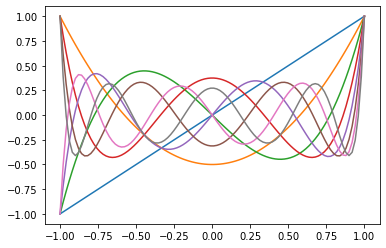

In [22]:
_x = np.linspace(-1,1,100)

for i, p in enumerate(Legendre):
    if i!= 0:
        pn = sym.lambdify([x],p,'numpy')
        plt.plot(_x,pn(_x))

In [6]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [7]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [13]:
integrate.quad(f,a,b)

(0.2928932188134524, 3.2517679528326894e-15)